# 2A. Monsoon (Wang)

This notebook demonstrates how to use the PCDMI Monsoon (Wang) driver to calculate the Monsoon metrics ([Wang et al. 2011](https://doi.org/10.1007/s00382-010-0877-0)).

> Wang, B., Kim, HJ., Kikuchi, K. et al. Diagnostic metrics for evaluation of annual and diurnal cycles. Clim Dyn 37, 941–955 (2011). https://doi.org/10.1007/s00382-010-0877-0

It is expected that you have downloaded the sample data as demonstrated in [the download notebook](Demo_0_download_data.ipynb)

The following cell reads in the choices you made during the download data step.

In [1]:
from user_choices import demo_data_directory, demo_output_directory

In [2]:
# To open and display one of the graphics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

import os
import glob

%matplotlib inline

In [3]:
# To open and display one of the graphics
from IPython.display import display_png, JSON, Image

## Basic Example

The Monsoon (Wang) driver is simple and does not require many settings. These are the required parameters:  
```  
modnames   
test_data_path  
reference_data_path   
results_dir  
```  

For a full look at the driver options available, use `monsoon_wang_driver.py --help` in the command line.

Important note about `threshold`: The default threshold for the threat score is 2.5 mm/day, but the Monsoon (Wang) driver assumes that the precipitation inputs are in units of kg m-2 s-1 and adjust the threshold value accordingly. **If your precipitation data uses units of mm/day, set `threshold = 2.5`.**

First, display the parameter file used for this example:

In [4]:
with open("basic_monsoon_wang_param.py") as f:
    print(f.read())

import os

#
#  OPTIONS ARE SET BY USER IN THIS FILE AS INDICATED BELOW BY:
#
#

# LIST OF MODEL VERSIONS TO BE TESTED
modnames = ['CanCM4']

# ROOT PATH FOR MODELS CLIMATOLOGIES
test_data_path = 'demo_data_tmp/CMIP5_demo_clims/cmip5.historical.%(model).r1i1p1.mon.pr.198101-200512.AC.v20200426.nc'

# ROOT PATH FOR OBSERVATIONS
reference_data_path = 'demo_data_tmp/obs4MIPs_PCMDI_monthly/NOAA-NCEI/GPCP-2-3/mon/pr/gn/v20210727/pr_mon_GPCP-2-3_PCMDI_gn_197901-201907.nc'

# DIRECTORY WHERE TO PUT RESULTS
results_dir = 'demo_output_tmp/monsoon_wang'

# Threshold
threshold = 2.5 / 86400



**↳ Note: input data can be either of annual cycle climatology or monthly time series of precipitation.**

The following command is used to run the Monsoon (Wang) metrics driver via the command line. Bash cell magic is used to run this command as a subprocess in the next cell.
```
monsoon_wang_driver.py -p basic_monsoon_wang_param.py
```
Note: the following old method is now deprecated
```
# (deprecated old method) mpindex_compute.py -p basic_monsoon_wang_param.py
```

In [5]:
%%bash
monsoon_wang_driver.py -p basic_monsoon_wang_param.py --obs_mask True


 updated json_filename  =   monsoon_wang_4.json
obs file: demo_data_tmp/obs4MIPs_PCMDI_monthly/NOAA-NCEI/GPCP-2-3/mon/pr/gn/v20210727/pr_mon_GPCP-2-3_PCMDI_gn_197901-201907.nc
Input data, shaped (487, 72, 144), must have 12 time steps (months) for annual climatology.
Annual cycle calculated for the input data for period ('1981-01-01', '2004-12-31'), data shaped , shaped (12, 72, 144).
modelFile:  demo_data_tmp/CMIP5_demo_clims/cmip5.historical.CanCM4.r1i1p1.mon.pr.198101-200512.AC.v20200426.nc


2025-09-09 13:15:21,646 [WARNING]: dataset.py(_is_decodable:548) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2025-09-09 13:15:21,646 [WARNING]: dataset.py(_is_decodable:548) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


domain:  AllM
Figure(800x600)
domain:  NAMM
Figure(800x600)
domain:  SAMM
Figure(800x600)
domain:  NAFM
Figure(800x600)
domain:  SAFM
Figure(800x600)
domain:  ASM
Figure(800x600)
domain:  AUSM
Figure(800x600)


INFO::2025-09-09 13:16::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/monsoon_wang/monsoon_wang_4.json
2025-09-09 13:16:03,941 [INFO]: base.py(write:344) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/monsoon_wang/monsoon_wang_4.json
2025-09-09 13:16:03,941 [INFO]: base.py(write:344) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/monsoon_wang/monsoon_wang_4.json


### Check diagnostics from all Monsoon regions

In [6]:
# Find all PNG files in the output directory
list_files = glob.glob(os.path.join(demo_output_directory, "monsoon_wang/*.png"))

Number of PNG files: 7


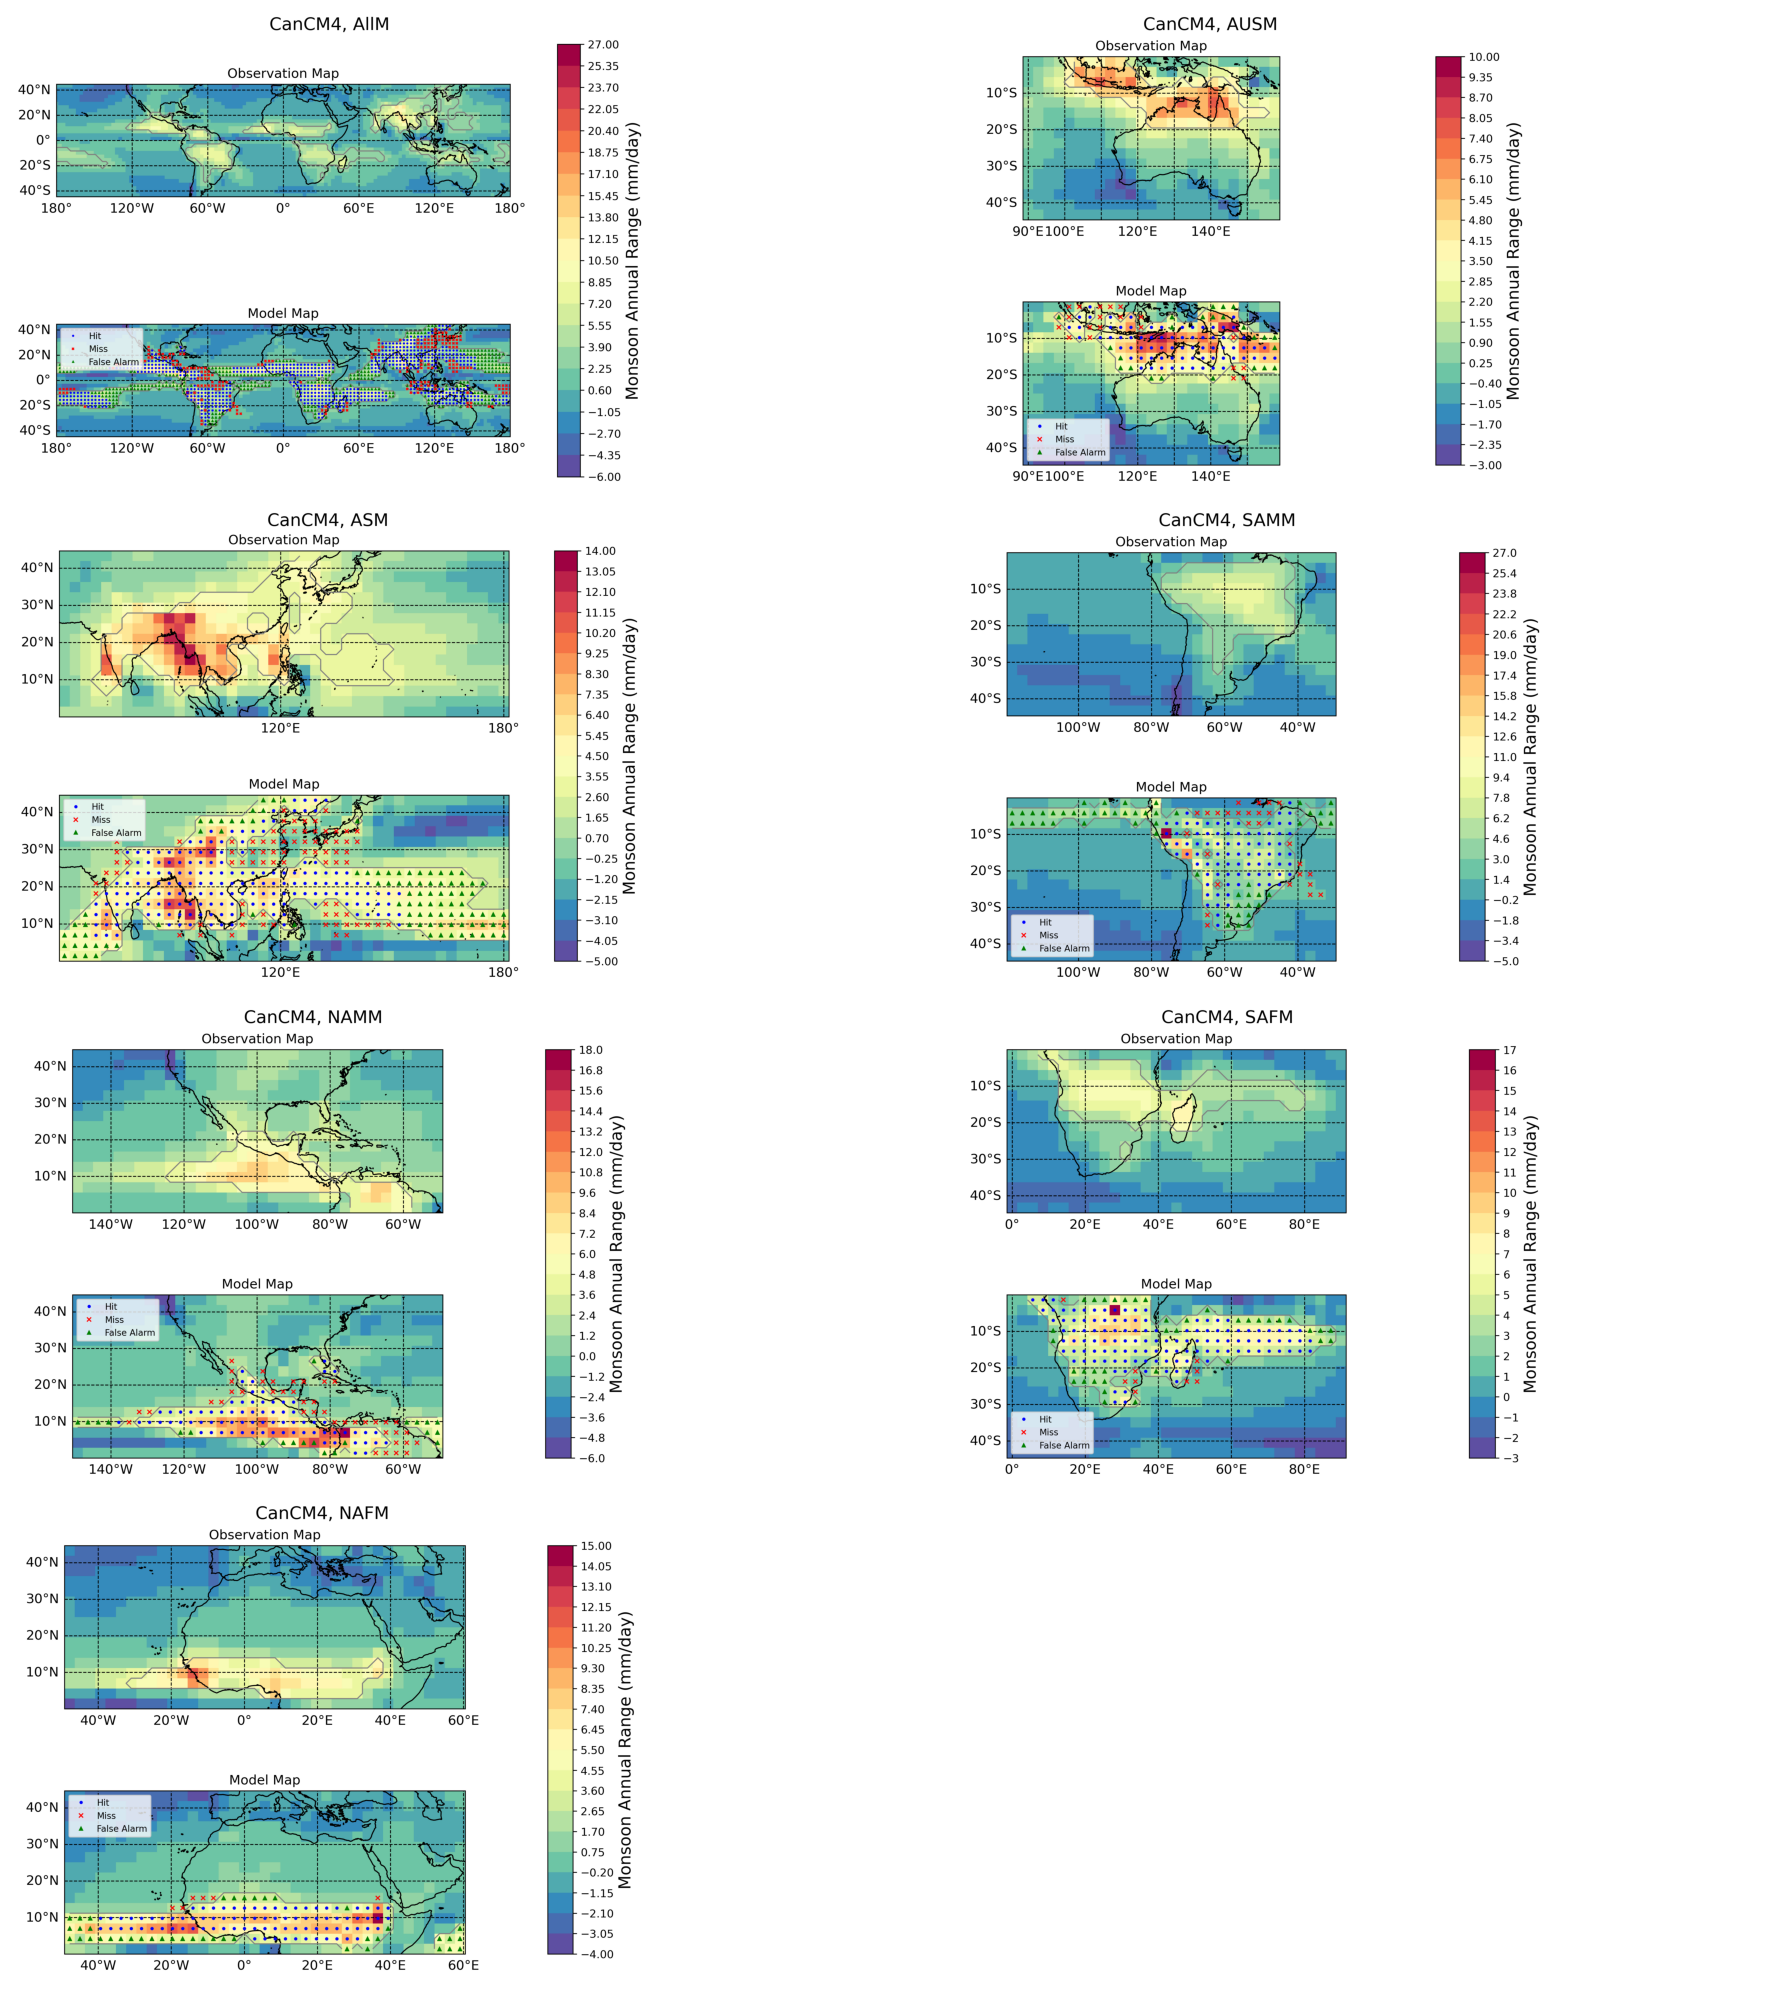

In [7]:
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Count the number of PNG files
num_files = len(list_files)
print(f"Number of PNG files: {num_files}")

# Calculate the number of rows needed (2 images per row)
num_cols = 2
num_rows = math.ceil(num_files / num_cols)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Display each image
for i, file in enumerate(list_files):
    img = mpimg.imread(file)
    axes[i].imshow(img)
    axes[i].axis('off')

# Hide any unused subplots
for j in range(num_files, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


**Figure caption**:    Annual precipitation range (shading, in mm/day) in different monsoon domains
    in GPCP3.2  (top panels, 1998-2017) and CanCM4 model (bottom panels, 1981-2005).
    Blue dots show locations where the model agree with observations,
    red crosses represent monsoon definition threshold is met in the observations but not in the model,
    green triangles are monsoon locations in the model but not in the observations.

### Check details from one of the regions

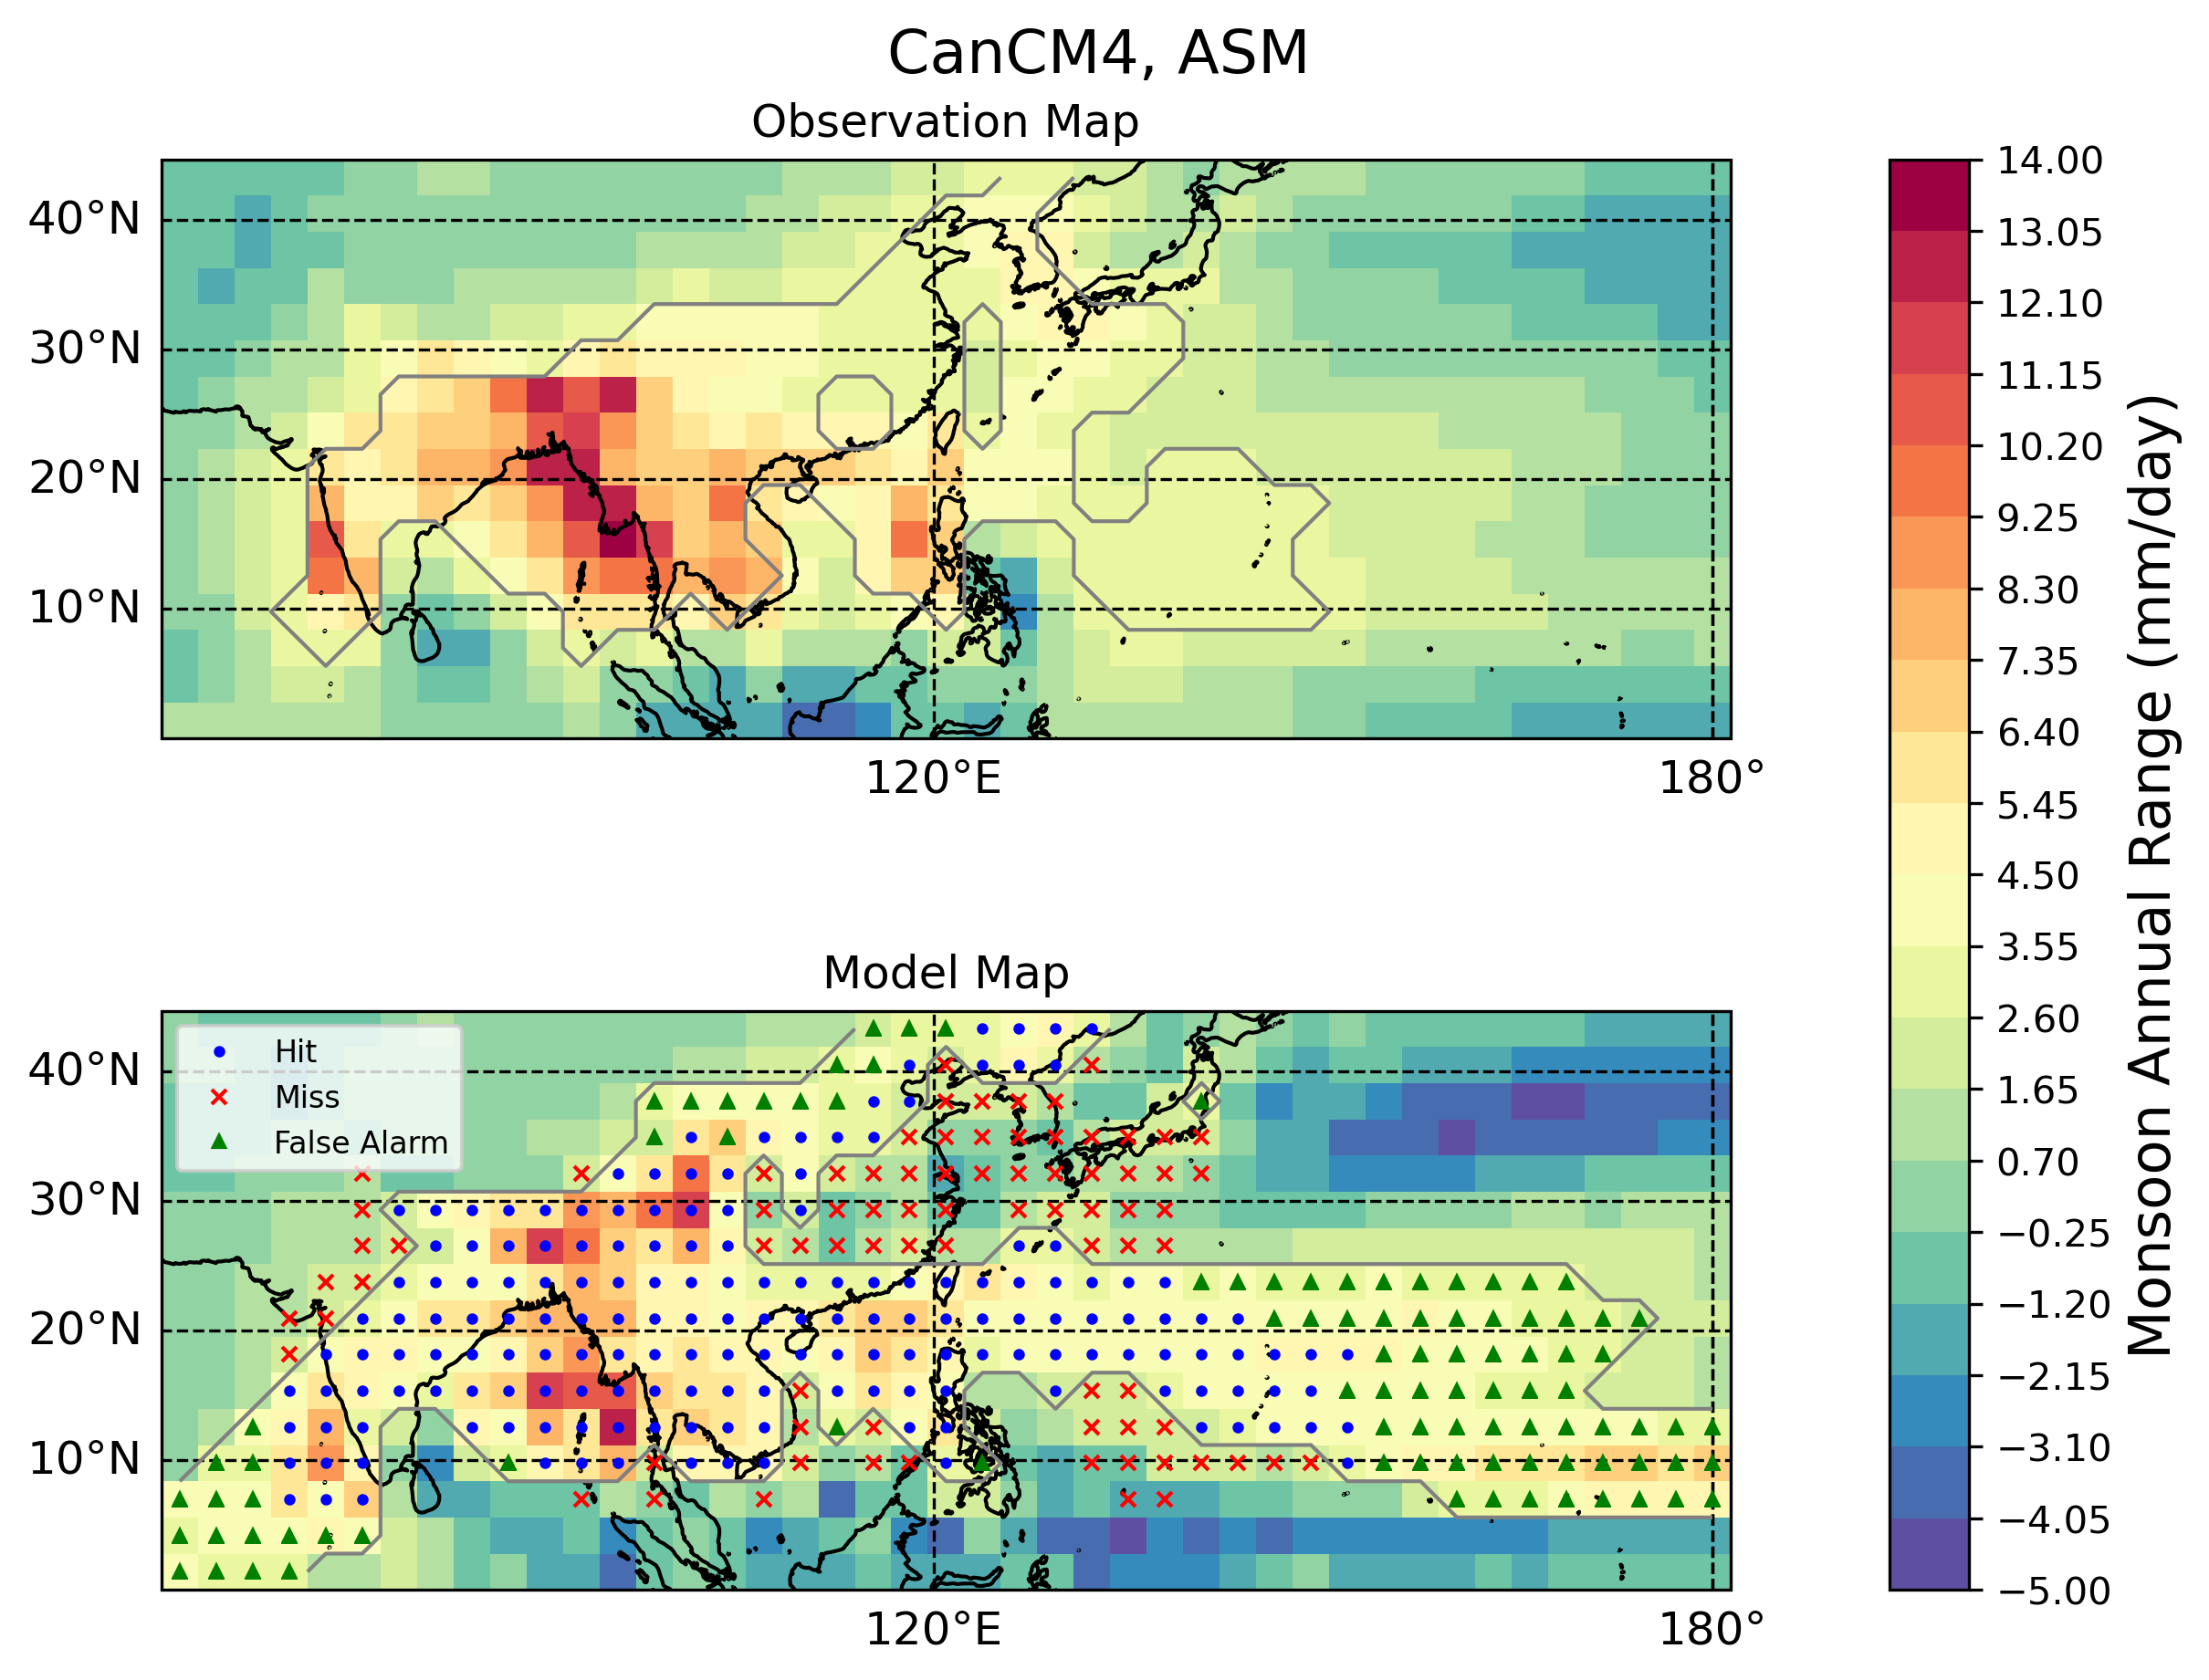

In [8]:
a = Image(list_files[2])
display_png(a)

**Figure caption**:    Annual precipitation range (shading, in mm/day) in the Asia monsoon domain
    in GPCP3.2  (top, 1998-2017) and CanCM4 model (bottom, 1981-2005).
    Blue dots show locations where the model agree with observations,
    red crosses represent monsoon definition threshold is met in the observations but not in the model,
    green triangles are monsoon locations in the model but not in the observations.

### Check metrics

The metrics are saved to monsoon_wang.json, opened below.

In [9]:
import json
import os
with open(os.path.join(demo_output_directory, "monsoon_wang/monsoon_wang.json")) as f:
    metric = json.load(f)["RESULTS"]
print(json.dumps(metric, indent=2))

{
  "CanCM4": {
    "AllM": {
      "cor": "0.777",
      "rmsn": "0.710",
      "threat_score": "0.552"
    },
    "NAMM": {
      "cor": "0.518",
      "rmsn": "1.326",
      "threat_score": "0.540"
    },
    "SAMM": {
      "cor": "0.798",
      "rmsn": "1.425",
      "threat_score": "0.512"
    },
    "NAFM": {
      "cor": "0.808",
      "rmsn": "0.635",
      "threat_score": "0.644"
    },
    "SAFM": {
      "cor": "0.863",
      "rmsn": "0.558",
      "threat_score": "0.725"
    },
    "ASM": {
      "cor": "0.875",
      "rmsn": "0.550",
      "threat_score": "0.497"
    },
    "AUSM": {
      "cor": "0.816",
      "rmsn": "0.656",
      "threat_score": "0.624"
    }
  }
}


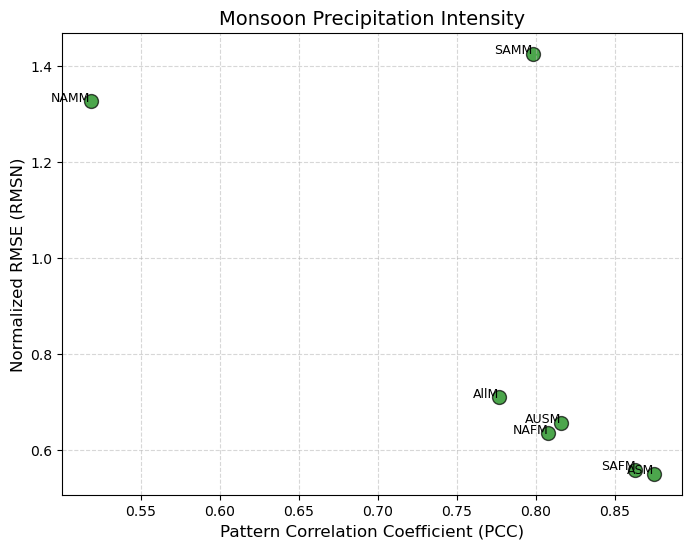

In [10]:
import json
import matplotlib.pyplot as plt

# JSON data
data = metric

# Extracting data
categories = data["CanCM4"].keys()
cor = [float(data["CanCM4"][cat]["cor"]) for cat in categories]
rmsn = [float(data["CanCM4"][cat]["rmsn"]) for cat in categories]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(cor, rmsn, color='green', s=100, edgecolor='black', alpha=0.7)

# Adding labels for each point
for i, cat in enumerate(categories):
    plt.text(cor[i], rmsn[i], cat, fontsize=9, ha='right')

# Setting up the plot
plt.title("Monsoon Precipitation Intensity", fontsize=14)
plt.xlabel("Pattern Correlation Coefficient (PCC)", fontsize=12)
plt.ylabel("Normalized RMSE (RMSN)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Command line options

The following example shows how to use the command line to specify one model, increase the threshold to 3 mm/day (for data in kg m-2 s-1), change the name of the output json (`outnj`), and specify the model experiment and MIP:

In [11]:
!monsoon_wang_driver.py -p basic_monsoon_wang_param.py \
--modnames "['CanCM4']" \
--results_dir {demo_output_directory}/monsoon_wang_ex2 \
--outnj "monsoon_wang_ex2" \
--experiment historical \
--MIP cmip5 \
--threshold 0.00003472222


 updated json_filename  =   monsoon_wang_ex2
obs file: demo_data_tmp/obs4MIPs_PCMDI_monthly/NOAA-NCEI/GPCP-2-3/mon/pr/gn/v20210727/pr_mon_GPCP-2-3_PCMDI_gn_197901-201907.nc
Input data, shaped (487, 72, 144), must have 12 time steps (months) for annual climatology.
Annual cycle calculated for the input data for period ('1981-01-01', '2004-12-31'), data shaped , shaped (12, 72, 144).
modelFile:  demo_data_tmp/CMIP5_demo_clims/cmip5.historical.CanCM4.r1i1p1.mon.pr.198101-200512.AC.v20200426.nc
2025-09-09 13:16:36,983 [WARNING]: dataset.py(_is_decodable:548) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2025-09-09 13:16:36,983 [WARNING]: dataset.py(_is_decodable:548) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
domain:  AllM
Figure(800x600)
dom

Opening the new results file, you will find that the threat_scores have changed slightly as a result of changing the threshold.

In [12]:
with open(os.path.join(demo_output_directory, "monsoon_wang_ex2/monsoon_wang_ex2.json")) as f:
    metric = json.load(f)["RESULTS"]
print(json.dumps(metric, indent=2))

{
  "CanCM4": {
    "AllM": {
      "cor": "0.783",
      "rmsn": "0.494",
      "threat_score": "0.489"
    },
    "NAMM": {
      "cor": "0.592",
      "rmsn": "0.786",
      "threat_score": "0.541"
    },
    "SAMM": {
      "cor": "0.815",
      "rmsn": "0.647",
      "threat_score": "0.475"
    },
    "NAFM": {
      "cor": "0.880",
      "rmsn": "0.428",
      "threat_score": "0.650"
    },
    "SAFM": {
      "cor": "0.897",
      "rmsn": "0.346",
      "threat_score": "0.623"
    },
    "ASM": {
      "cor": "0.866",
      "rmsn": "0.365",
      "threat_score": "0.416"
    },
    "AUSM": {
      "cor": "0.748",
      "rmsn": "0.512",
      "threat_score": "0.544"
    }
  }
}


Another example below is for using user provided reference dataset by using the `reference_data_path` parameter in the commend line (or it can be updated from the `basic_monsoon_wang_param.py` parameter file):

In [13]:
!monsoon_wang_driver.py -p basic_monsoon_wang_param.py \
--modnames "['CanCM4']" \
--results_dir {demo_output_directory}/monsoon_wang_ex3 \
--outnj "monsoon_wang_ex3" \
--experiment historical \
--MIP cmip5 \
--threshold 0.00003472222 \
--reference_data_path {demo_data_directory}/obs4MIPs_PCMDI_clims/pr/GPCP-2-3/v20210804/pr_mon_GPCP-2-3_PCMDI_gn.200301-201812.AC.v20210804.nc


 updated json_filename  =   monsoon_wang_ex3
obs file: demo_data_tmp/obs4MIPs_PCMDI_clims/pr/GPCP-2-3/v20210804/pr_mon_GPCP-2-3_PCMDI_gn.200301-201812.AC.v20210804.nc
Error opening reference data file with decode_times=True: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'. Trying with decode_times=False...
modelFile:  demo_data_tmp/CMIP5_demo_clims/cmip5.historical.CanCM4.r1i1p1.mon.pr.198101-200512.AC.v20200426.nc
2025-09-09 13:17:42,935 [WARNING]: dataset.py(_is_decodable:548) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2025-09-09 13:17:42,935 [WARNING]: dataset.py(_is_decodable:548) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
domain:  AllM
Figure(800x600)
domain:  NAMM
Figure(800x600)
domain:  SAM